# 2181. Merge Nodes in Between Zeros
https://leetcode.com/problems/merge-nodes-in-between-zeros/description/?envType=daily-question&envId=2024-07-04

In [2]:
from typing import Optional,List
head = [0,3,1,0,4,5,2,0]

In [13]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    def __repr__(self): #print ans = func result
        return f"{self.val}-->{self.next}" if self.next else f"{self.val}"
    

In [24]:
def mergeNodes(head: Optional[ListNode]) -> Optional[ListNode]:
    #link SOP
    # 創新的link
    link = ListNode(0)
    pointer_new = link # 箭頭
    pointer_old = head.next #第一個都是0，所以從第二個開始，箭頭指向第二個
    sum = 0

    while pointer_old is not None:
        if pointer_old.val == 0:
            if sum!=0: 
                pointer_new.next = ListNode(sum)
                pointer_new = pointer_new.next #箭頭指向下一個
            sum = 0
        else:
            sum += pointer_old.val
        pointer_old = pointer_old.next

    return link.next #箭頭指向下一個，第一個是0


In [25]:
link = ListNode(head[0])
pointer = link
for ele in head[1:]: #塞值
    pointer.next = ListNode(ele)
    pointer = pointer.next
print("input link = ",link)
print(mergeNodes(link))

input link =  0-->3-->1-->0-->4-->5-->2-->0
4-->11


# Editorial : two pointer
重點有:
1. 不創新的將第一個非0當作母體，之後做加總 (modify.val)
2. sum_ 暫存加總，箭頭指向下一個(next_sum)
3. 遇到0，將1.的modify==sum_，之後將箭頭指向下一個非0位置(next_sum.next)
4. (重點箭頭縫合) 將1.的箭頭(modify.next )指向3.的位置(next_sum)，縫合箭頭 (modify.next)

p.s. modify 是移動值非一整個link

* Time complexity: O(n)
* Space complexity: O(1)

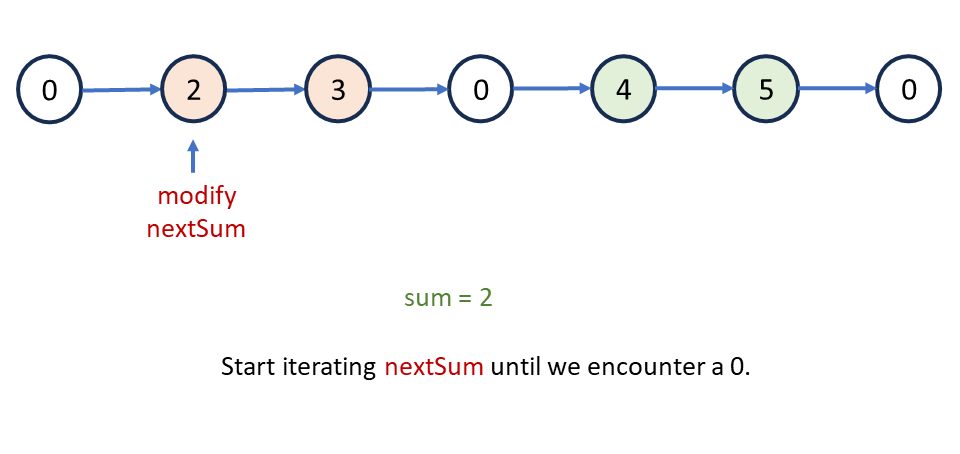
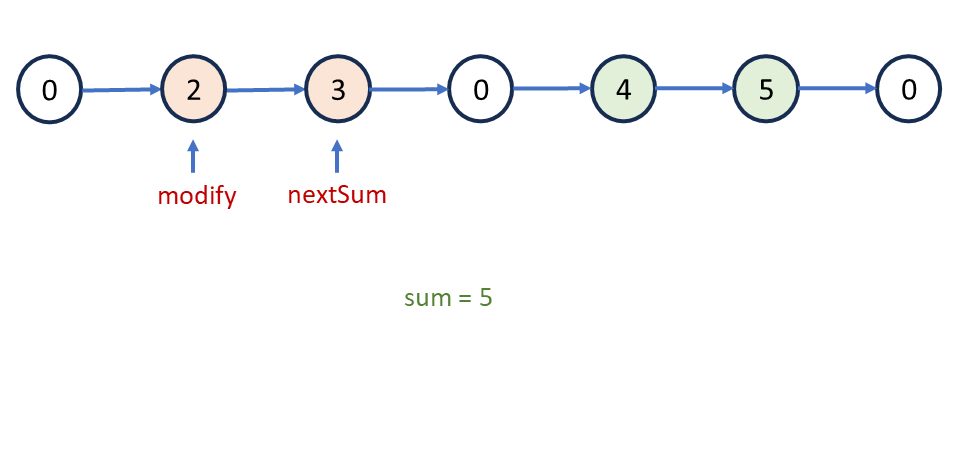
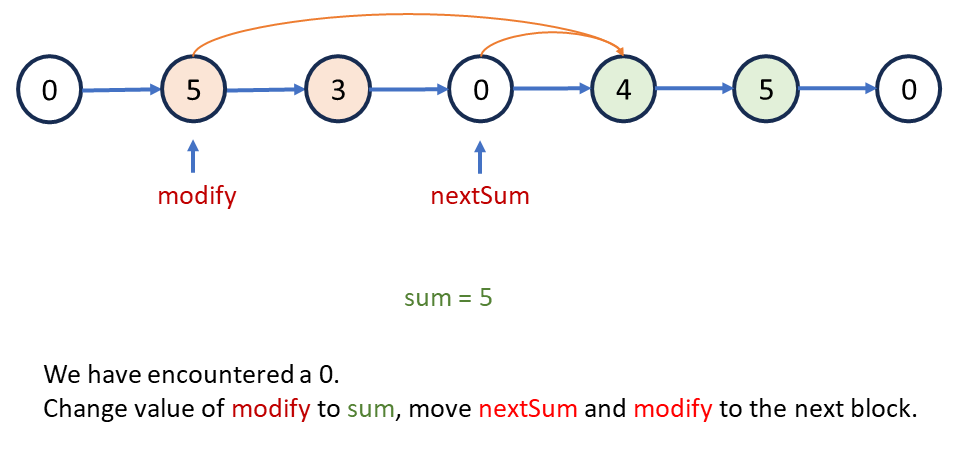
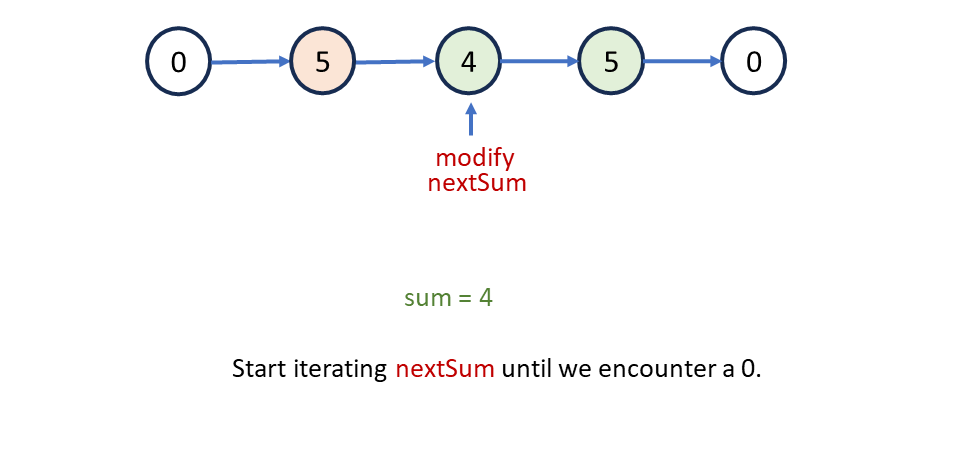
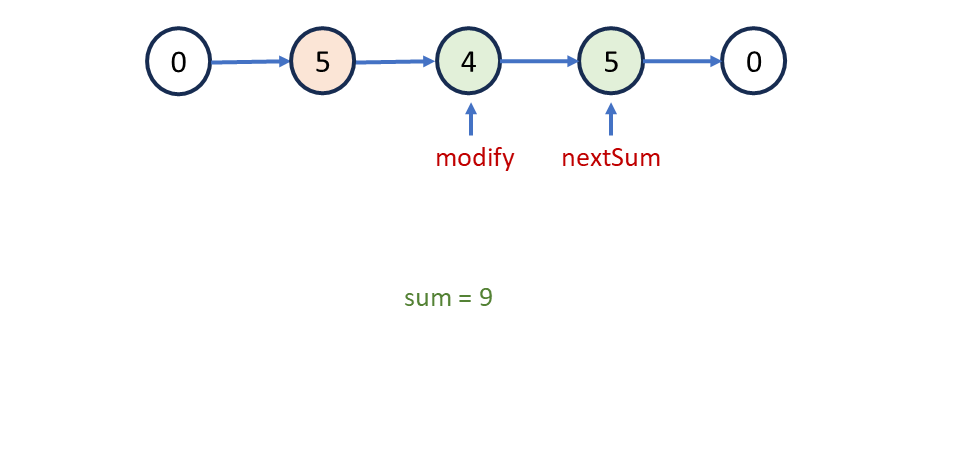
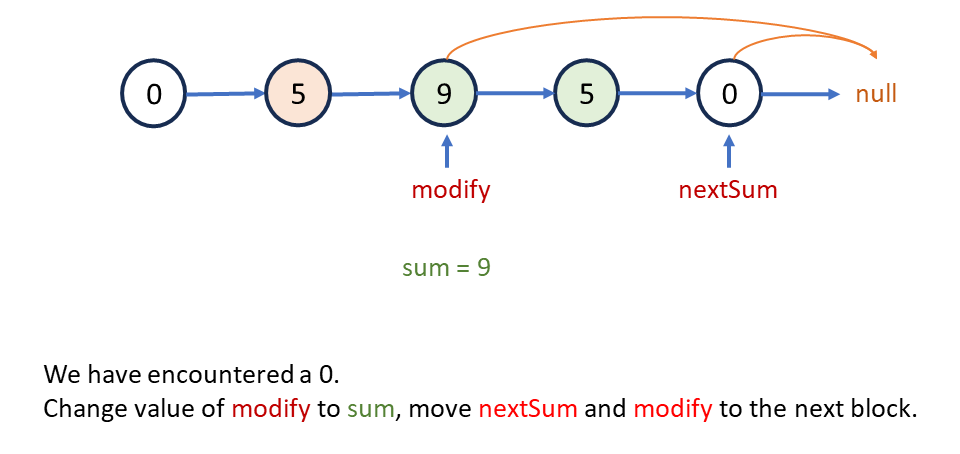
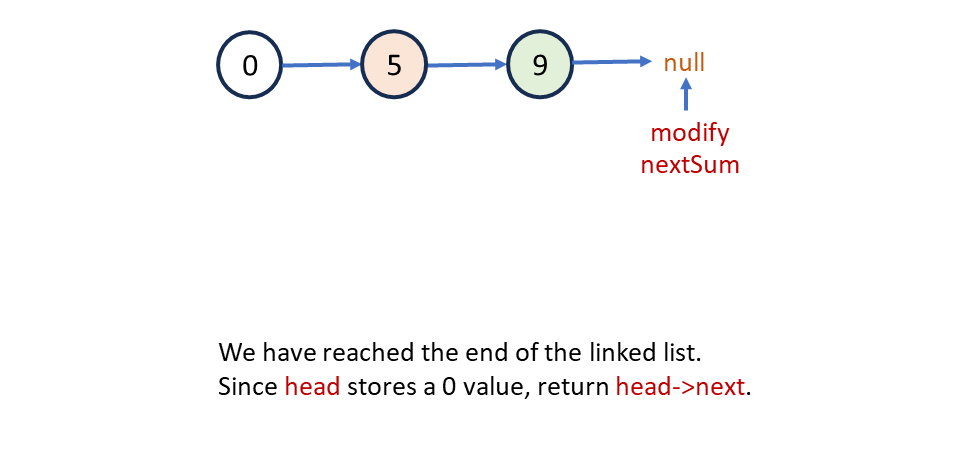


In [28]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    def __repr__(self): #print ans = func result
        return f"{self.val}-->{self.next}" if self.next else f"{self.val}"
    
def mergeNodes(head: Optional[ListNode]) -> Optional[ListNode]:
    # Initialize a sentinel/dummy node with the first non-zero value.
    modify = head.next
    next_sum = modify 
    
    while next_sum:
        sum = 0
        # Find the sum of all nodes until you encounter a 0.
        while next_sum.val !=0:
            sum += next_sum.val
            next_sum = next_sum.next
        # Assign the sum to the current node's value.
        modify.val = sum
        # Move nextSum to the first non-zero value of the next block.
        next_sum = next_sum.next
        # Move modify also to this node.
        modify.next = next_sum
        modify = modify.next
    return head


link = ListNode(head[0])
pointer = link
for ele in head[1:]: #塞值
    pointer.next = ListNode(ele)
    pointer = pointer.next
print("input link = ",link)
print(mergeNodes(link))

input link =  0-->3-->1-->0-->4-->5-->2-->0
None


## Recursion 遞迴
* Time complexity: O(n)
* Space complexity: O(n)

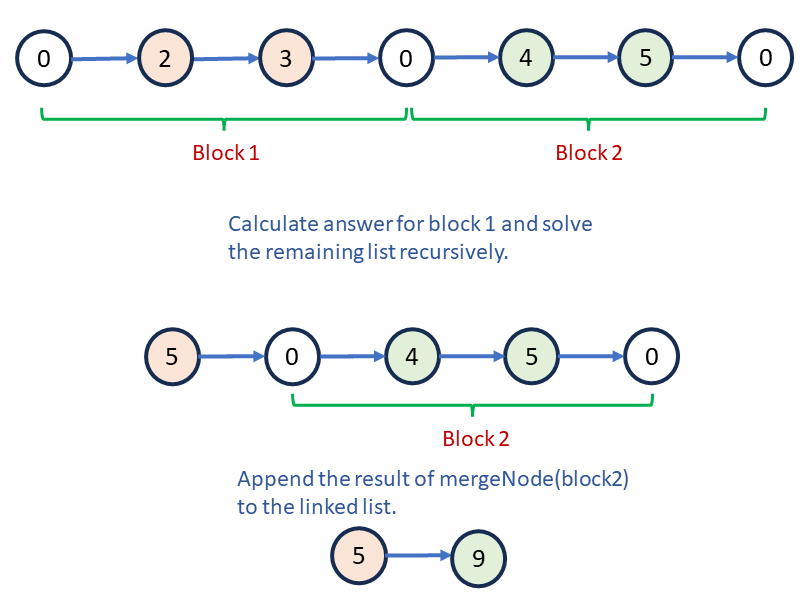

In [30]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
    def __repr__(self): #print ans = func result
        return f"{self.val}-->{self.next}" if self.next else f"{self.val}"
    
def mergeNodes(head: Optional[ListNode]) -> Optional[ListNode]:
    # Start with the first non-zero value.
    head = head.next
    if head is None:
        return head
    
    # Initialize a dummy head node.
    temp = head
    sum = 0
    while temp.val != 0:
        sum += temp.val
        temp = temp.next
    # Store the sum in head's value.
    head.val = sum
    # Store head's next node as the recursive result for temp node.
    head.next = mergeNodes(temp)
    return head

link = ListNode(head[0])
pointer = link
for ele in head[1:]: #塞值
    pointer.next = ListNode(ele)
    pointer = pointer.next
print("input link = ",link)
print(mergeNodes(link))

input link =  0-->3-->1-->0-->4-->5-->2-->0
4-->11
